In [1]:
import pandas as pd
import os 
from pandas import json_normalize
import json
from IPython.display import display, HTML  # Updated import statement
display(HTML("<style>.container { width:100% !important; }</style>"))

display(HTML("<style>.dataframe { width:100% !important; }</style>"))
pd.set_option('display.max_columns', None)  # Ensures all columns of the DataFrame are displayed
pd.set_option('display.width', None)        # Utilizes maximum width of the display


# Extraction

**Get model json to dataframe**
extracting the evaluation metrics values and the data from all models from plotting or table creation

In [2]:
all_metrics_df = pd.DataFrame()
a = pd.DataFrame()
MODEL_ID = 'Model_ID'

frames_names = []
data_frames = {}
count = 0

# Evaluate results of every output
dir = '../res'
for day in os.listdir(f"{dir}"):
    for timestamp in os.listdir(f'{dir}/{day}'):
        for file in os.listdir(f'{dir}/{day}/{timestamp}'):
            if file.endswith('.json'):
                model_results_path = f'{dir}/{day}/{timestamp}/{file}'
                df = pd.read_json(model_results_path)
                model_id =os.path.splitext(os.path.basename(model_results_path))[0]
                
                if file.startswith('all_data'):
                    frames_names.append(model_id)
                    data_frames[frames_names[count]] = df
                    count += 1
                else: 
                    with open(model_results_path, 'r') as f:
                        data = json.load(f)
                        
                        # Flatten each part of the JSON separately and then merge
                        for key, value in data.items():
                            if isinstance(value, dict):  # This checks if the value is a nested dictionary
                                temp_df = json_normalize(value)
                                temp_df.fillna(0, inplace=True)
                                #ifNan = temp_df.columns[temp_df.isna().all().tolist()]
                                #print('All-NA columns:', ifNan)
                                #temp_df['metric'] = key
                                temp_df['model_id'] = model_id
                                all_metrics_df = pd.concat([all_metrics_df, temp_df], ignore_index=True)
                
                

all_metrics_df.rename(columns={'name':'Metric_Name'}, inplace=True)

print("All headers of all_metrics df")            
print(all_metrics_df.columns)


All headers of all_metrics df
Index(['Metric_Name', 'population', 'size', 'total', 'min', 'q1', 'median',
       'q3', 'max', 'mean', 'sd', 'model_id'],
      dtype='object')


In [3]:
# Correct way to print DataFrame headers
for model_id, df in data_frames.items():
    print(f"Columns in DataFrame for {model_id}: {df.columns.tolist()}")


Columns in DataFrame for all_data_BTHS-GPT3.5: ['data_path', 'prevalence', 'n', 'tp', 'tn', 'fp', 'fn', 'accuracy', 'balanced_accuracy', 'f1', 'recall', 'precision', 'specificity', 'err']
Columns in DataFrame for all_data_GBG-MISTRAL: ['data_path', 'prevalence', 'n', 'tp', 'tn', 'fp', 'fn', 'accuracy', 'balanced_accuracy', 'f1', 'recall', 'precision', 'specificity', 'err']
Columns in DataFrame for all_data_BTHS-MISTRAL: ['data_path', 'prevalence', 'n', 'tp', 'tn', 'fp', 'fn', 'accuracy', 'balanced_accuracy', 'f1', 'recall', 'precision', 'specificity', 'err']


In [4]:
print(all_metrics_df.columns)
all_metrics_df.to_csv('all_results.csv', index=False)

Index(['Metric_Name', 'population', 'size', 'total', 'min', 'q1', 'median',
       'q3', 'max', 'mean', 'sd', 'model_id'],
      dtype='object')


# Plotting

Extracting df from data_frames

In [5]:
for name in frames_names:
   print(f"Columns in DataFrame for {name}: {data_frames[name].columns.tolist()}")

Columns in DataFrame for all_data_BTHS-GPT3.5: ['data_path', 'prevalence', 'n', 'tp', 'tn', 'fp', 'fn', 'accuracy', 'balanced_accuracy', 'f1', 'recall', 'precision', 'specificity', 'err']
Columns in DataFrame for all_data_GBG-MISTRAL: ['data_path', 'prevalence', 'n', 'tp', 'tn', 'fp', 'fn', 'accuracy', 'balanced_accuracy', 'f1', 'recall', 'precision', 'specificity', 'err']
Columns in DataFrame for all_data_BTHS-MISTRAL: ['data_path', 'prevalence', 'n', 'tp', 'tn', 'fp', 'fn', 'accuracy', 'balanced_accuracy', 'f1', 'recall', 'precision', 'specificity', 'err']


In [6]:
#Example using accuracy
print(frames_names[1])
specific_df = data_frames[frames_names[1]] #GBG-MISTRAL
print(specific_df['accuracy'])


accuracy = specific_df['accuracy']
recall = specific_df['recall']
balanced_accuracy = specific_df['balanced_accuracy']
f1 = specific_df['f1']
precision = specific_df['precision']


all_data_GBG-MISTRAL
0     0.998219
1     0.997626
2     0.998219
3     0.997626
4     0.998219
5     0.998219
6     0.997626
7     0.998219
8     0.998219
9     0.998219
10    0.997626
11    0.997626
12    0.998219
13    0.998219
14    0.997626
15    0.998219
16    0.997626
17    0.997626
18    0.998219
19    0.997626
20    0.997626
21    0.997626
22    0.997626
23    0.998219
24    0.997626
25    0.998219
26    0.997626
27    0.998219
28    0.998219
29    0.998219
30    0.998219
Name: accuracy, dtype: float64


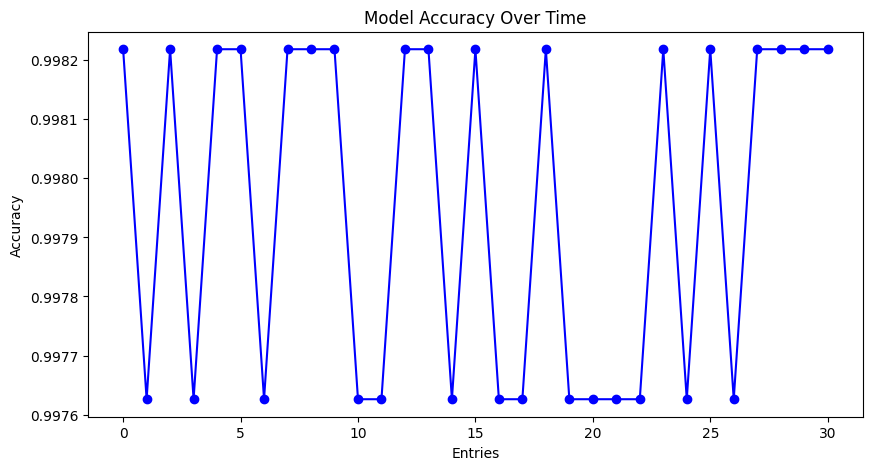

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Let's assume accuracy_values is your Series containing accuracy data
# For example: accuracy_values = specific_df['accuracy']

# Creating a simple plot
plt.figure(figsize=(10, 5))  # Setting the figure size
plt.plot(specific_df['accuracy'], marker='o', linestyle='-', color='b')  # Plotting the accuracy values
plt.title('Model Accuracy Over Time')  # Adding a title to the plot
plt.xlabel('Entries')  # Labeling the x-axis
plt.ylabel('Accuracy')  # Labeling the y-axis
#plt.grid(True)  # Adding a grid for easier readability
plt.show()  # Displaying the plot


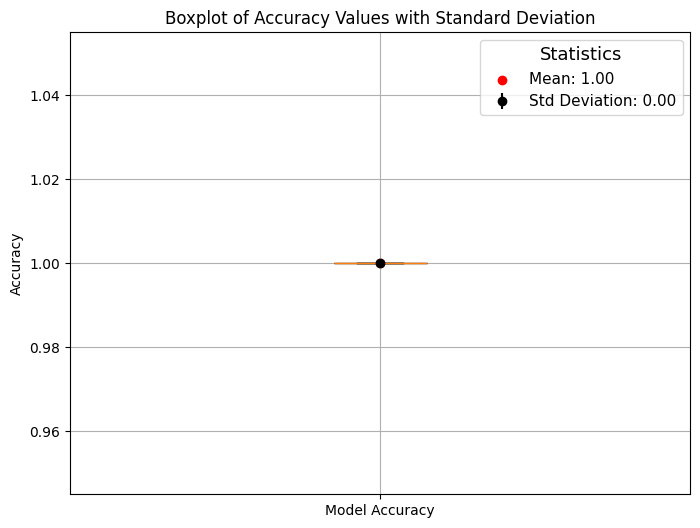

In [8]:
# Calculate the mean and standard deviation
accuracy_values = specific_df['recall']

# Calculate the mean and standard deviation
mean_accuracy = accuracy_values.mean()
std_accuracy = accuracy_values.std()

# Create a boxplot
plt.figure(figsize=(8, 6))
boxplot = plt.boxplot(accuracy_values, vert=True, patch_artist=True)  # `patch_artist=True` fills the box with color

# Highlight the mean and standard deviation
mean_marker = plt.scatter(1, mean_accuracy, color='red', label=f'Mean: {mean_accuracy:.2f}')  # Label mean with its value
plt.errorbar(1, mean_accuracy, yerr=std_accuracy, fmt='o', color='black', label=f'Std Deviation: {std_accuracy:.2f}')  # Label std deviation with its value

# Adding labels and title
plt.title('Boxplot of Accuracy Values with Standard Deviation')
plt.ylabel('Accuracy')
plt.xticks([1], ['Model Accuracy'])  # Assuming there's only one boxplot, we label it accordingly

# Add a legend to the plot
plt.legend(title="Statistics", title_fontsize='13', loc='upper right', fontsize='11', fancybox=True)

# Show the plot
plt.grid(True)
plt.show()

In [9]:
print(specific_df.columns)

Index(['data_path', 'prevalence', 'n', 'tp', 'tn', 'fp', 'fn', 'accuracy',
       'balanced_accuracy', 'f1', 'recall', 'precision', 'specificity', 'err'],
      dtype='object')


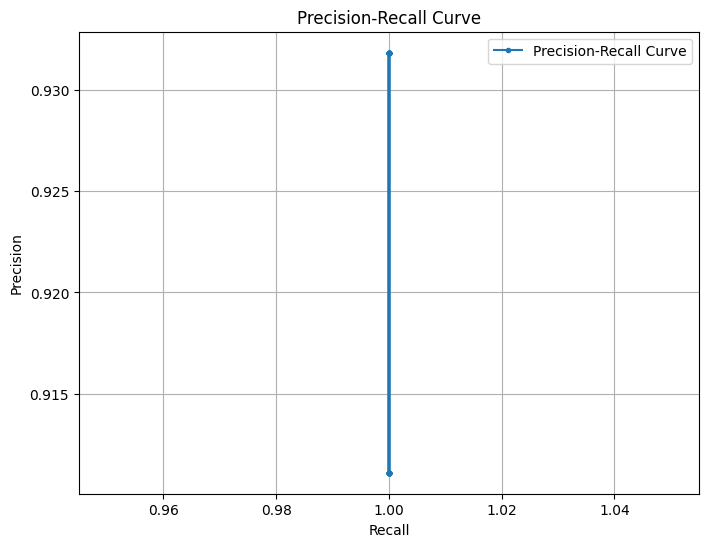

In [10]:
# Accessing the precomputed precision and recall values
precision_values = specific_df['precision']
recall_values = specific_df['recall']

# Create a Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall_values, precision_values, marker='.', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
print(specific_df.columns) 

Index(['data_path', 'prevalence', 'n', 'tp', 'tn', 'fp', 'fn', 'accuracy',
       'balanced_accuracy', 'f1', 'recall', 'precision', 'specificity', 'err'],
      dtype='object')


In [12]:
spec_table = specific_df[['prevalence','n','tp','tn','fp','fn','accuracy','precision','recall','f1','specificity']]
print(spec_table)

    prevalence     n  tp    tn  fp  fn  accuracy  precision  recall        f1  \
0     0.024347  1684  41  1640   3   0  0.998219   0.931818       1  0.964706   
1     0.024332  1685  41  1640   4   0  0.997626   0.911111       1  0.953488   
2     0.024347  1684  41  1640   3   0  0.998219   0.931818       1  0.964706   
3     0.024332  1685  41  1640   4   0  0.997626   0.911111       1  0.953488   
4     0.024347  1684  41  1640   3   0  0.998219   0.931818       1  0.964706   
5     0.024347  1684  41  1640   3   0  0.998219   0.931818       1  0.964706   
6     0.024332  1685  41  1640   4   0  0.997626   0.911111       1  0.953488   
7     0.024347  1684  41  1640   3   0  0.998219   0.931818       1  0.964706   
8     0.024347  1684  41  1640   3   0  0.998219   0.931818       1  0.964706   
9     0.024347  1684  41  1640   3   0  0.998219   0.931818       1  0.964706   
10    0.024332  1685  41  1640   4   0  0.997626   0.911111       1  0.953488   
11    0.024332  1685  41  16

# To Table

In [13]:
latex_table = spec_table.to_latex(index=False)
print(latex_table)

\begin{tabular}{rrrrrrrrrrr}
\toprule
prevalence & n & tp & tn & fp & fn & accuracy & precision & recall & f1 & specificity \\
\midrule
0.024347 & 1684 & 41 & 1640 & 3 & 0 & 0.998219 & 0.931818 & 1 & 0.964706 & 1 \\
0.024332 & 1685 & 41 & 1640 & 4 & 0 & 0.997626 & 0.911111 & 1 & 0.953488 & 1 \\
0.024347 & 1684 & 41 & 1640 & 3 & 0 & 0.998219 & 0.931818 & 1 & 0.964706 & 1 \\
0.024332 & 1685 & 41 & 1640 & 4 & 0 & 0.997626 & 0.911111 & 1 & 0.953488 & 1 \\
0.024347 & 1684 & 41 & 1640 & 3 & 0 & 0.998219 & 0.931818 & 1 & 0.964706 & 1 \\
0.024347 & 1684 & 41 & 1640 & 3 & 0 & 0.998219 & 0.931818 & 1 & 0.964706 & 1 \\
0.024332 & 1685 & 41 & 1640 & 4 & 0 & 0.997626 & 0.911111 & 1 & 0.953488 & 1 \\
0.024347 & 1684 & 41 & 1640 & 3 & 0 & 0.998219 & 0.931818 & 1 & 0.964706 & 1 \\
0.024347 & 1684 & 41 & 1640 & 3 & 0 & 0.998219 & 0.931818 & 1 & 0.964706 & 1 \\
0.024347 & 1684 & 41 & 1640 & 3 & 0 & 0.998219 & 0.931818 & 1 & 0.964706 & 1 \\
0.024332 & 1685 & 41 & 1640 & 4 & 0 & 0.997626 & 0.911111 & 1 & 